# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Dataset Overview

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [3]:
print(f'This dataset contains of {df.shape[0]} Rows and {df.shape[1]} Columns')

This dataset contains of 348 Rows and 7 Columns


In [7]:
# check missing values and duplicated values
print(f'Check Missing Values \n{df.isnull().sum()}')
print('\n')
print(f'Num of duplicated values {df.duplicated().sum()}')

Check Missing Values 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Num of duplicated values 0


Data is clean no need to handle missing values and duplicated values

# Exploratory Data Analysis

In [32]:
num = ['age', 'bmi', 'children', 'charges']
cat = ['sex', 'smoker', 'region']

In [11]:
eda=df.copy()

## Descriptive Analysis

In [33]:
eda[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,348.0,39.591954,14.417015,18.000,27.000000,40.00000,53.00000,64.00000
bmi,348.0,30.676552,5.625850,15.960,26.782500,30.30000,34.77750,49.06000
children,348.0,1.091954,1.192021,0.000,0.000000,1.00000,2.00000,5.00000
charges,348.0,14016.426293,12638.887852,1137.011,4888.466125,9719.30525,19006.31615,51194.55914


## Univariate Numeric Analysis

In [34]:
len(num)

4

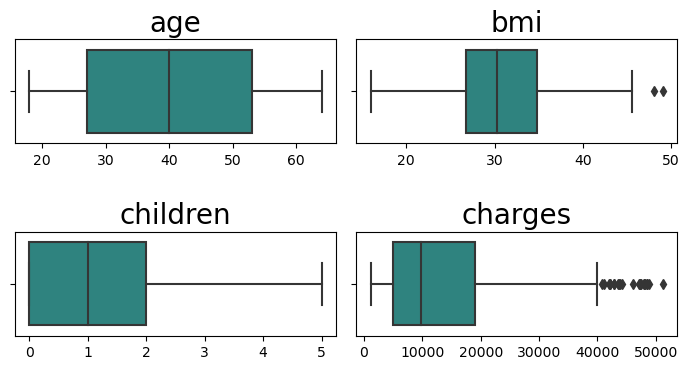

In [39]:
plt.figure(figsize=(7,4))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

No extreme values, no need to do outlier handling

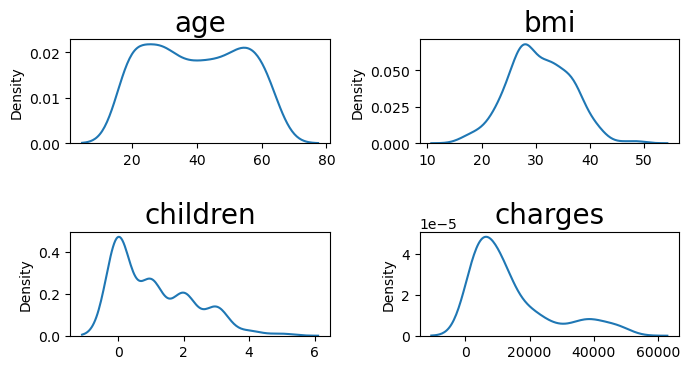

In [40]:
plt.figure(figsize=(7,4))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

## Univariate Category Analysis

In [42]:
len(cat)

3

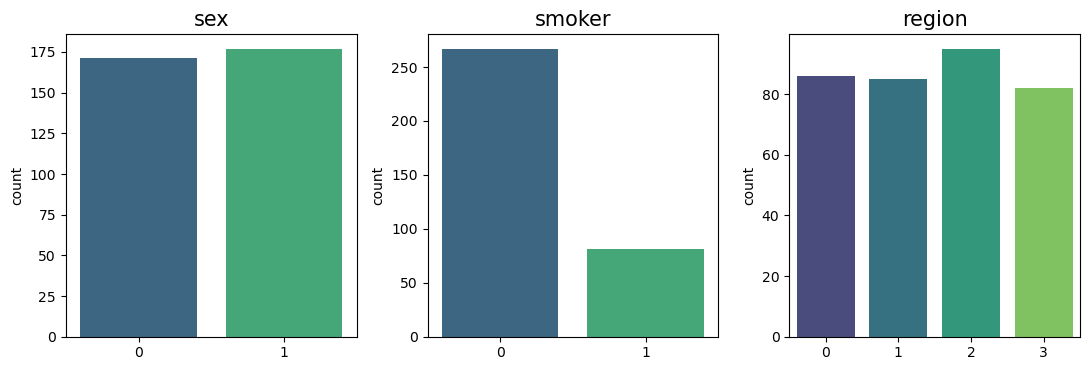

In [55]:
plt.figure(figsize=(11,4))
for i in range(0, len(cat)):
    plt.subplot(1,3,i+1)
    sns.countplot(x=eda[cat[i]], palette='viridis')
    plt.title(cat[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Numeric Analysis

In [58]:
num[:-1]

['age', 'bmi', 'children']

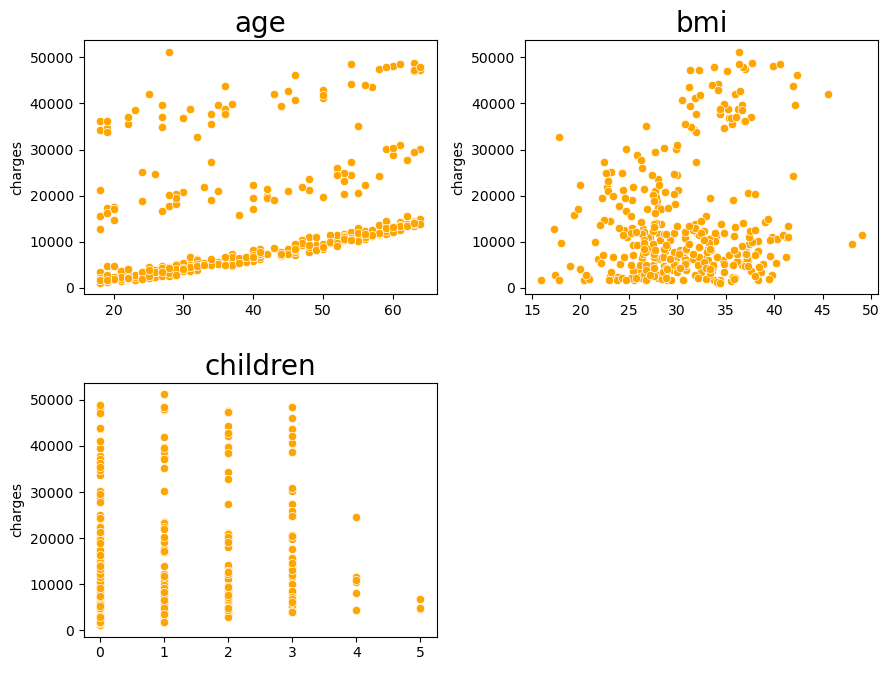

In [62]:
plt.figure(figsize=(9,7))
for i in range(0, len(num[:-1])):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=eda[num[:-1][i]], y=eda['charges'], color='orange')
    plt.title(num[:-1][i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Category Analysis

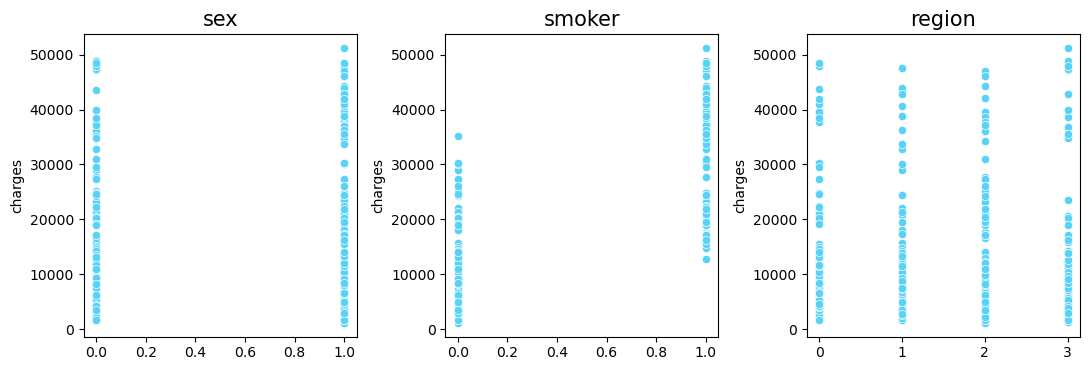

In [64]:
plt.figure(figsize=(11,4))
for i in range(0, len(cat)):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x=eda[cat[i]], y=eda['charges'], color='#58D3F7')
    plt.title(cat[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Cat vs Num

<AxesSubplot:xlabel='bmi', ylabel='charges'>

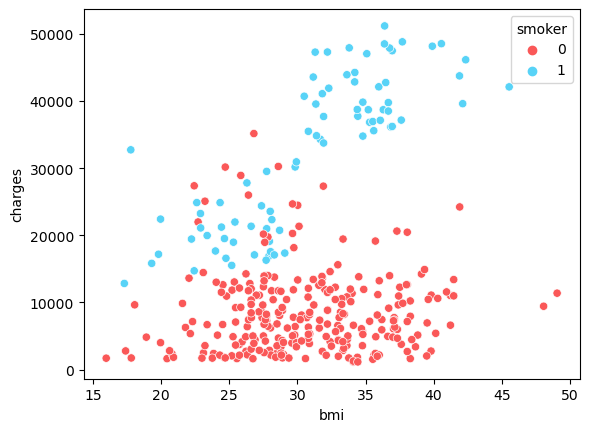

In [66]:
import seaborn as sns  # Imorting Seaborn library
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="bmi", y="charges", data=df, palette=pal, hue='smoker')

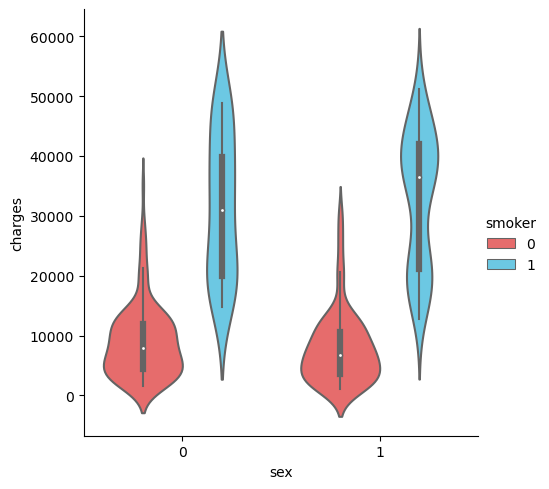

In [67]:
pal = ["#FA5858", "#58D3F7"]
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = pal)

## Multivariate Analysis

Text(0.5, 1.0, 'Smokers')

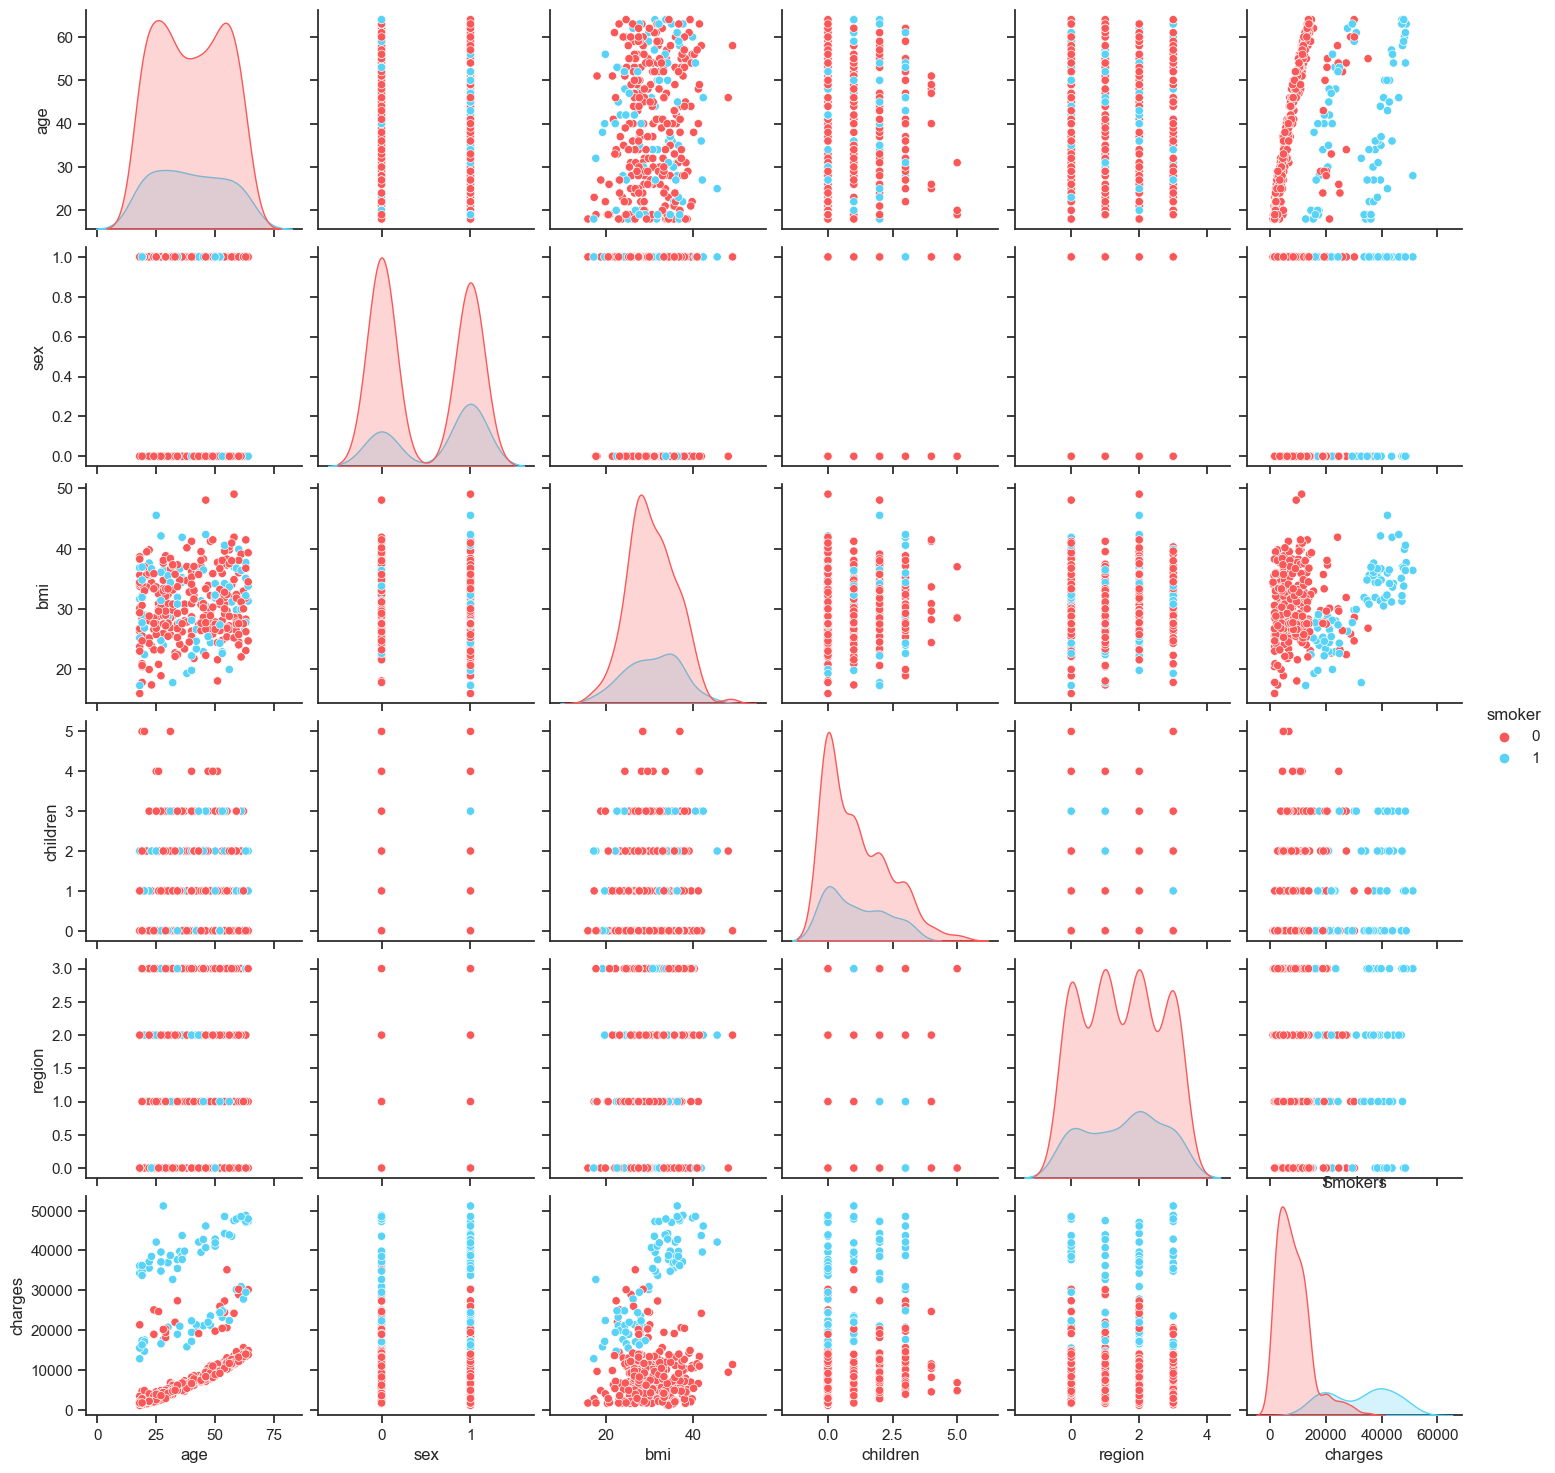

In [69]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="smoker", palette=pal)
plt.title("Smokers")

# Pre Processing

## Drop irrelevant feature

In [70]:
# drop region
df.drop(["region"], axis=1, inplace=True) 
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


## Split Data

In [86]:
X = df.drop(['charges'], axis = 1)
y = df.charges

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

## Feature Scaling

In [88]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling

In [95]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

## Simple Linear Regression

In [89]:
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.6836173215996538


In [90]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [96]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -0.4825939575304605
Testing Accuracy for Multiple Linear Regression Model:  -0.7358351521683506
RMSE for Training Data:  15893.423016976149
RMSE for Testing Data:  14463.40691346211
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.727967642069437


## Polynomial

In [91]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  # Create a PolynomialFeatures instance in degree 3
x_train_poly = polynomial_features.fit_transform(X_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.fit_transform(X_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [97]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8902696027737683
Testing Accuracy for Polynomial Regression Model:  0.733920248510276
RMSE for Training Data:  4323.841897322969
RMSE for Testing Data:  5662.683367588014
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.8381005376071624


## Decision Tree Regressor

In [92]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(max_depth=5, random_state=13)

In [98]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.9183265961752307
Testing Accuracy for Decision Tree Regression Model:  0.7751343683277117
RMSE for Training Data:  3730.3248863144618
RMSE for Testing Data:  5205.685262015018
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8460615160492906


## Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=13)

In [99]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.9401879519307212
Testing Accuracy for Random Forest Regression Model:  0.8015275994830983
RMSE for Training Data:  3192.2777183692724
RMSE for Testing Data:  4890.648231917616
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8689553722379783


## SVR

In [94]:
from sklearn.svm import SVR  # Import SVR model

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=1000, gamma='auto', kernel='linear')

In [100]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.7246724515106013
Testing Accuracy for Support Vector Regression Model:  0.4713263053024197
RMSE for Training Data:  6849.063042206995
RMSE for Testing Data:  7981.972297528944
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.6224665946413234


In [101]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.482594,-0.735835,15893.423017,14463.406913,0.727968
Polynomial Regression,fit_intercept=False,0.890270,0.733920,4323.841897,5662.683368,0.838101
Decision Tree Regression,max_depth=5,0.918327,0.775134,3730.324886,5205.685262,0.846062
Random Forest Regression,"n_estimators=400, max_depth=5",0.940188,0.801528,3192.277718,4890.648232,0.868955
Support Vector Regression,"kernel=”linear”, C=1000",0.724672,0.471326,6849.063042,7981.972298,0.622467


# Hyperparameter 2

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, X_train, y_train, X_test, y_test):
    print("MAE: %.2f" % mean_absolute_error(y_test, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(y_test, pred)) # Explained variance score: 1 is perfect prediction

## Ridge

In [106]:
# RIDGE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

alpha = [0.01, 0.1, 1, 2, 5, 10, 100, 200, 230, 250, 265, 270, 275, 290, 300, 500] # alpha
solver = ['lsqr', 'auto', 'sag', 'saga']
hyperparameters = dict(alpha=alpha, solver=solver)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(X_train, y_train)
pred = best_model.predict(X_test)
eval_regression(best_model, pred, X_train, y_train, X_test, y_test)

MAE: 4108.62
RMSE: 6145.97
R2 score: 0.69


## Random Forest Regressor

In [111]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 20)] 
criterion = ['squared_error', 'absolute_error', 'poisson']
max_depth = [int(x) for x in np.linspace(start=1, stop=30, num=20)]
min_samples_split = [int(x) for x in np.linspace(start=2, stop=20, num=12)]
min_samples_leaf = [int(x) for x in np.linspace(start=2, stop=20, num=13)]

hyperparameters = dict(n_estimators=n_estimators, 
                       criterion=criterion,
                       max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf)



rf_model = RandomForestRegressor()
rf = RandomizedSearchCV(rf_model, hyperparameters, cv=5, scoring='r2')

#Fitting Model
best_model = rf.fit(X_train, y_train)
pred = best_model.predict(X_test)
eval_regression(best_model, pred, X_train, y_train, X_test, y_test)

MAE: 2526.54
RMSE: 4660.29
R2 score: 0.82


# Let's test our best regression on some new data

In [113]:
input_data = {'age': [35],
              'sex': ['male'],
              'bmi': [26],
              'children': [0],
              'smoker': ['no'],
              'region': ['southeast']}

input_data = pd.DataFrame(input_data)
input_data

,age,sex,bmi,children,smoker,region
0,35,male,26,0,no,southeast


In [114]:
# Our simple pre-processing 
input_data.drop(["region"], axis=1, inplace=True) 
input_data['sex'] = input_data['sex'].map(lambda s :1  if s == 'female' else 0)
input_data['smoker'] = input_data['smoker'].map(lambda s :1  if s == 'yes' else 0)
input_data

,age,sex,bmi,children,smoker
0,35,0,26,0,0


In [115]:
# Scale our input data 
input_data = sc.transform(input_data)

# Reshape our input data in the format required by sklearn models
input_data = input_data.reshape(1, -1)
print(input_data.shape)
input_data

(1, 5)


array([[-0.34894423, -1.01934415, -0.86506474, -0.92526974, -0.55817362]])

In [116]:
# Get our predicted insurance rate for our new customer
rf.predict(input_data)

array([5477.95255816])